In [ ]:
 *********************************** SALES PREDICTION *************************************************

In [ ]:
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv("Advertising.csv")
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data=data.drop(columns=["Unnamed: 0"])
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
#Step 2:DataPreprocessing

In [5]:
#lets look for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
# there is no missing values in the data

c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

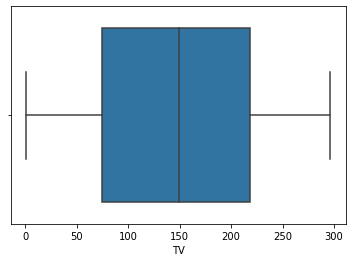

In [7]:
#lets look for outliers
sns.boxplot(data['TV'])

c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

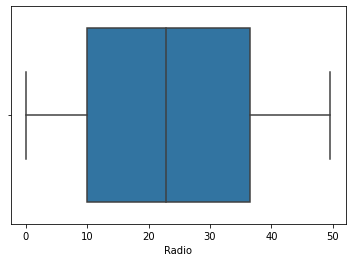

In [8]:
sns.boxplot(data['Radio'])

c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

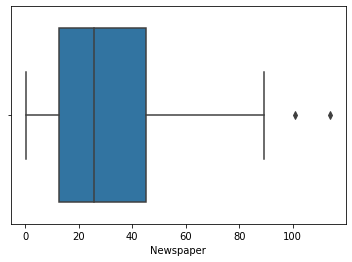

In [9]:
sns.boxplot(data['Newspaper'])

In [10]:
#from the above box plots swe can say that Newspaper calumn has outlier so we have to impute the values with its mean or median
newspaper_median = np.median(data['Newspaper'])
newspaper_median

25.75

c:\users\vamsi2001\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

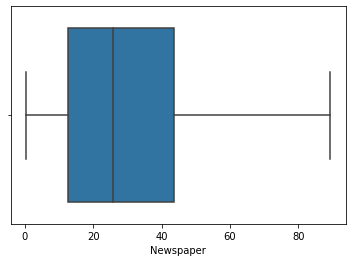

In [11]:
data['Newspaper'] = data['Newspaper'].apply(lambda x: 25.75 if x>= 95 else x)
sns.boxplot(data['Newspaper'])

In [12]:
#outliers are removed-----------------

<AxesSubplot:>

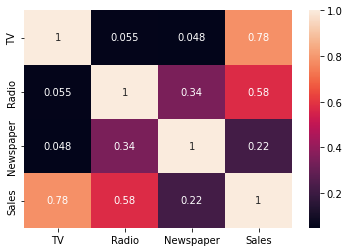

In [13]:
#Correlation analysis
sns.heatmap(data.corr(),annot=True)

In [14]:
#from the heat map we can say that TV,Radio features are highly correlated with Sales,compared to newspaper

In [19]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=lr.predict(x_test)

In [41]:
y_pred

array([10.06611331,  7.45841684,  7.01766601, 24.06431366, 12.00668036,
        6.53236834, 12.75193432, 15.12049312, 10.74224825, 16.35504373,
       22.86444788,  9.12844908, 10.47529058, 15.50242743, 11.59262147,
       12.1865579 , 18.78713611, 10.80701878, 15.89894359, 17.31912641,
       24.03330452,  9.60846538, 15.13162089, 12.37902548,  5.71413493,
       15.26497663, 12.29885221, 20.95552274, 13.41337392,  9.03269132,
       13.14509558, 21.3824749 , 18.12571801, 21.1808214 ,  6.55061287,
        6.14350195,  7.87488467, 12.98488725, 14.69065668,  6.18482298])

<AxesSubplot:xlabel='Sales'>

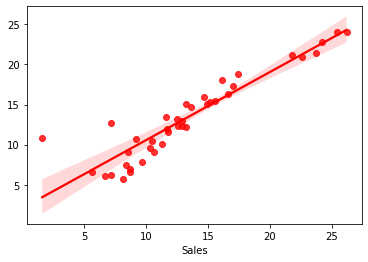

In [54]:
sns.regplot(x=y_test,y=y_pred,data=data,color='r')

In [62]:
print("Mean Squared Error is :",mean_squared_error(y_test,y_pred))
print("R2 score is  :",r2_score(y_test,y_pred))

Mean Squared Error is : 4.415901770398362
R2 score is  : 0.8596765228683662
